In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import sys
import seaborn as sns
import brewer2mpl 

### 20. 连续变量的直方图
直方图显示给定变量的频率分布。下面的表示基于分类变量对频率条进行分组，从而更好地了解连续变量和串联变量。

In [2]:
# Import Data
df = pd.read_csv("mpg_ggplot2.csv")
print(df.shape)
print(df.dtypes)
df.head()

(234, 11)
manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


7
[[5.7, 5.7, 6.2, 6.2, 7.0], [1.8, 1.8, 2.0, 2.0, 2.8, 2.8, 3.1, 1.8, 1.8, 2.0, 2.0, 2.8, 2.8, 3.1, 3.1, 2.4, 2.4, 2.5, 2.5, 2.5, 2.5, 2.2, 2.2, 2.4, 2.4, 3.0, 3.0, 3.3, 1.8, 1.8, 1.8, 1.8, 1.8, 2.0, 2.0, 2.0, 2.0, 2.8, 1.9, 2.0, 2.0, 2.0, 2.0, 2.5, 2.5, 2.8, 2.8], [2.8, 3.1, 4.2, 2.4, 2.4, 3.1, 3.5, 3.6, 2.4, 2.4, 2.4, 2.4, 2.5, 2.5, 3.3, 2.5, 2.5, 3.5, 3.5, 3.0, 3.0, 3.5, 3.1, 3.8, 3.8, 3.8, 5.3, 2.2, 2.2, 2.4, 2.4, 3.0, 3.0, 3.5, 1.8, 1.8, 2.0, 2.0, 2.8, 2.8, 3.6], [2.4, 3.0, 3.3, 3.3, 3.3, 3.3, 3.3, 3.8, 3.8, 3.8, 4.0], [3.7, 3.7, 3.9, 3.9, 4.7, 4.7, 4.7, 5.2, 5.2, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 5.2, 5.2, 5.7, 5.9, 4.2, 4.2, 4.6, 4.6, 4.6, 5.4, 5.4, 2.7, 2.7, 2.7, 3.4, 3.4, 4.0, 4.0], [3.8, 3.8, 4.0, 4.0, 4.6, 4.6, 4.6, 4.6, 5.4, 1.6, 1.6, 1.6, 1.6, 1.6, 1.8, 1.8, 1.8, 2.0, 2.0, 2.0, 2.0, 2.0, 2.7, 2.7, 2.7, 2.2, 2.2, 2.5, 2.5, 1.9, 1.9, 2.0, 2.0, 2.5, 2.5], [5.3, 5.3, 5.3, 5.7, 6.0, 5.3, 5.3, 5.7, 6.5, 3.9, 4.7, 4.7, 4.7, 5.2, 5.7, 5.9, 4.6, 5.4, 5.4, 4.0, 4.0, 4.0, 4.0, 4.6, 5.0,

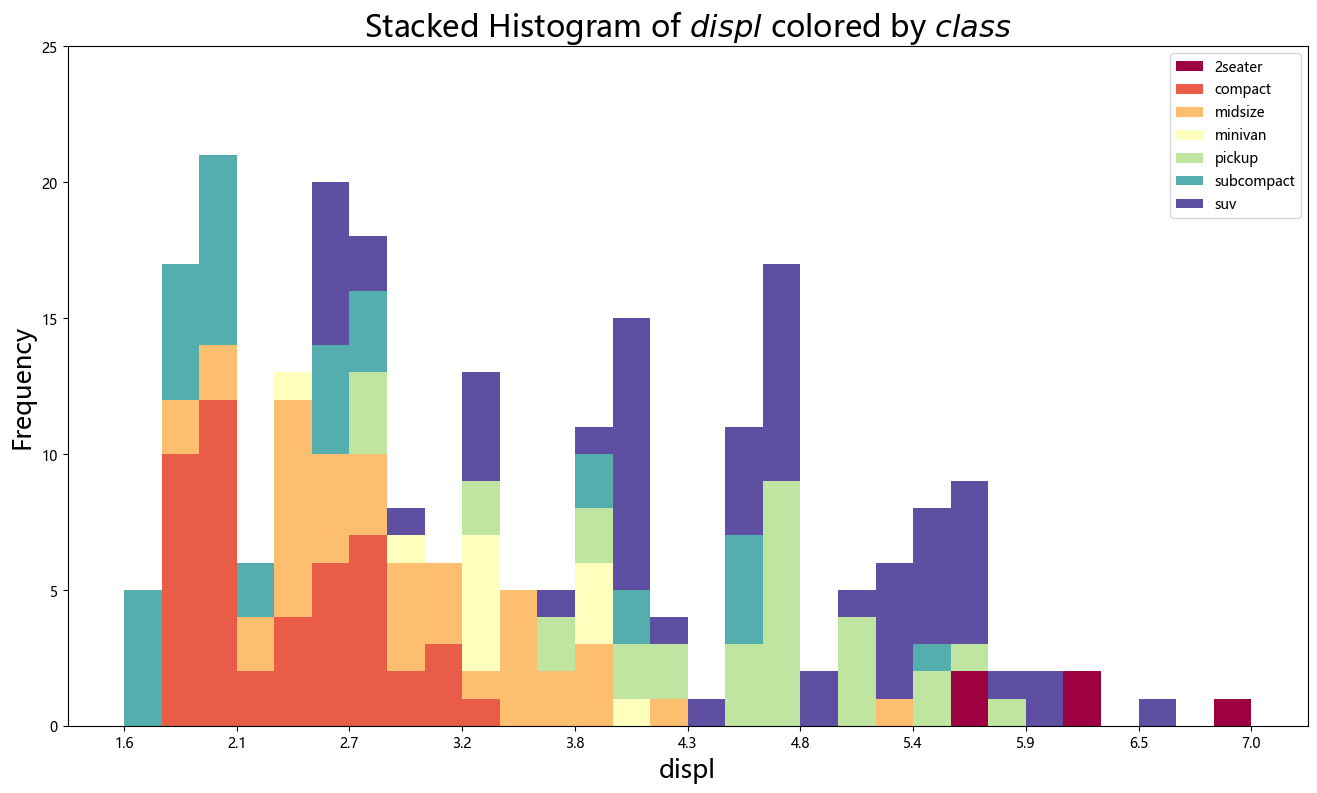

In [9]:
# Prepare data
x_var =  'displ'
groupby_var =  'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)#按照’class进行分组
vals = [df[x_var].values.tolist() for i, df in df_agg]
print(len(vals)) #7
print(vals)

# Draw
plt.figure(figsize=(16,9), dpi= 100)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]#颜色种类,7钟颜色
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])#直方图

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var,fontsize = 18)
plt.ylabel("Frequency",fontsize = 18)
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

### 21. 类型变量的直方图
分类变量的直方图显示该变量的频率分布。通过对条形图进行着色，您可以将分布与表示颜色的另一个分类变量相关联。

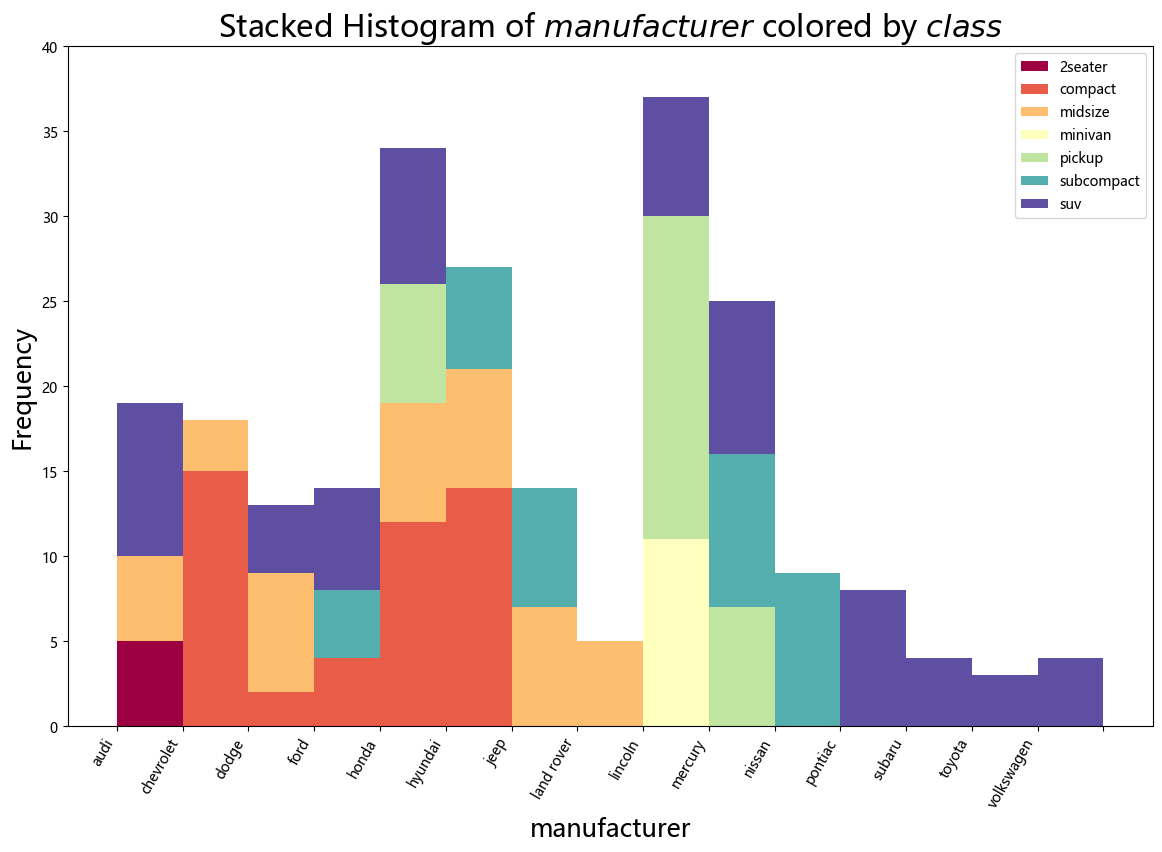

In [18]:
# Prepare data
x_var =  'manufacturer'
groupby_var =  'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)#按照’class进行分组
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(14,9), dpi= 100)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]#颜色种类,7钟颜色
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var,fontsize = 18)
plt.ylabel("Frequency",fontsize = 18)
plt.ylim(0, 40)
plt.xticks(ticks=bins, labels=np.unique(df[x_var]).tolist(), rotation=60, horizontalalignment= 'right' )
plt.show()

### 22. 密度图
密度图是一种常用工具，可视化连续变量的分布。通过“响应”变量对它们进行分组，您可以检查X和Y之间的关系。
以下情况，如果出于代表性目的来描述城市里程的分布如何随着汽缸数的变化而变化

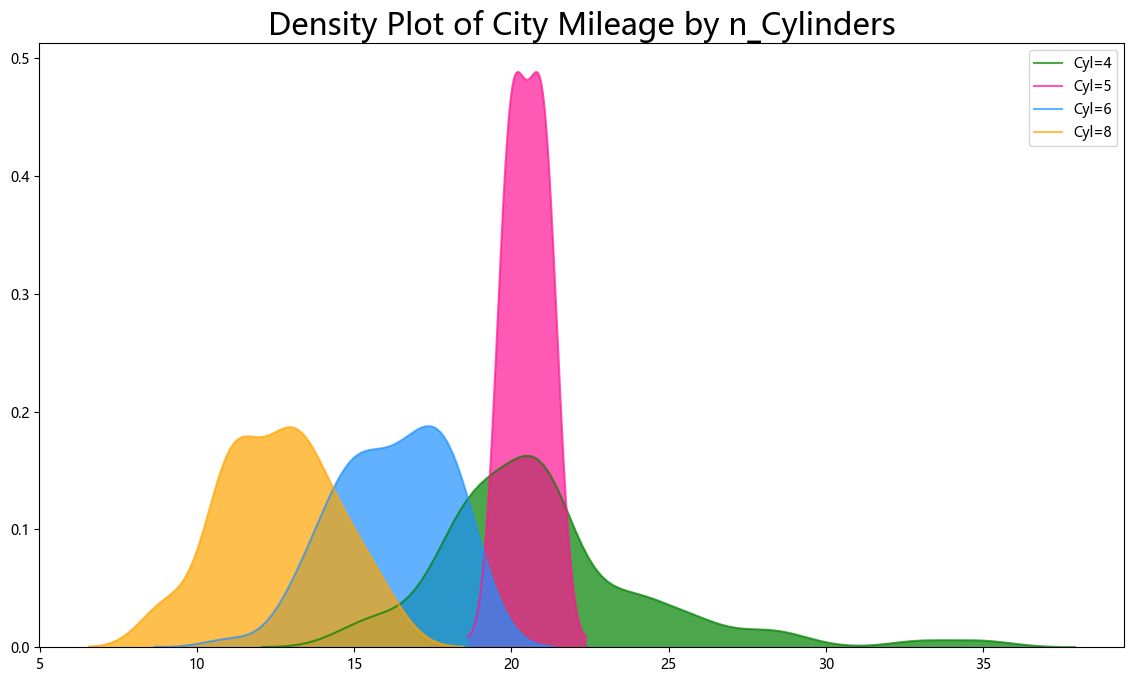

In [21]:
df = pd.read_csv("mpg_ggplot2.csv")
# Draw Plot
plt.figure(figsize=(14,8), dpi= 100)
sns.kdeplot(df.loc[df['cyl' ] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl' ] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
sns.kdeplot(df.loc[df['cyl' ] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl' ] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders' , fontsize=22)
plt.legend()

### 23. 直方密度线图
带有直方图的密度曲线将两个图表传达的集体信息汇集在一起，这样您就可以将它们放在一个图形而不是两个图形中

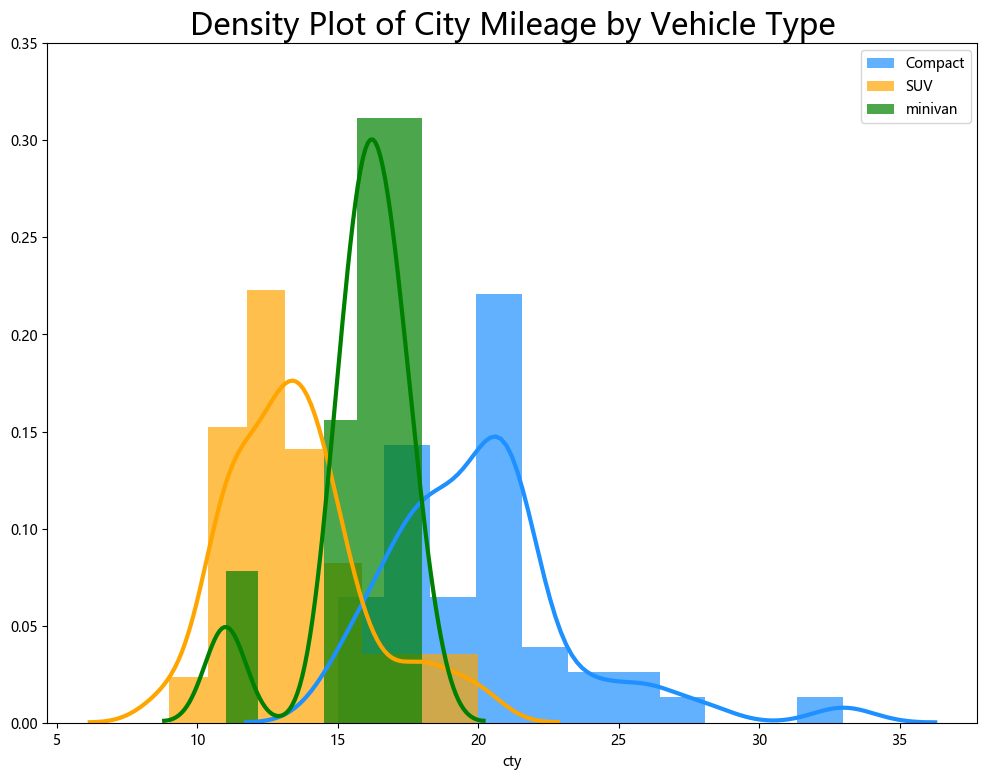

In [26]:
df = pd.read_csv("mpg_ggplot2.csv")
# Draw Plot
plt.figure(figsize=(12,9), dpi= 100)
sns.distplot(df.loc[df[ 'class' ] =='compact' , "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha' :.7}, kde_kws={ 'linewidth' :3})
sns.distplot(df.loc[df[ 'class' ] ==  'suv' , "cty"], color="orange", label="SUV", hist_kws={'alpha' :.7}, kde_kws={'linewidth' :3})
sns.distplot(df.loc[df[ 'class' ] ==  'minivan' , "cty"], color="g", label="minivan", hist_kws={'alpha' :.7}, kde_kws={'linewidth' :3})
plt.ylim(0, 0.35)

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type' , fontsize=22)
plt.legend()
plt.show()

### 24. Joy Plot
Joy Plot允许不同组的密度曲线重叠，这是一种可视化相对于彼此的大量组的分布的好方法。
它看起来很悦目，并清楚地传达了正确的信息。它可以使用joypy基于的包来轻松构建matplotlib

In [40]:
# !pip install joypy
# Import Data
mpg = pd.read_csv("mpg_ggplot2.csv")
# Draw Plot
plt.figure(figsize=(16,10), dpi= 100)
fig, axes = joypy.joyplot(mpg, column=['hwy' ,  'cty' ], by="class", ylim= own , figsize=(14,10))

# Decoration
plt.title( 'Joy Plot of City and Highway Mileage by Class' , fontsize=22)
plt.show()

NameError: name 'joypy' is not defined

<Figure size 1600x1000 with 0 Axes>

### 25. 分布式点图
分布点图显示按组分割的点的单变量分布。点数越暗，该区域的数据点集中度越高。通过对中位数进行不同着色，组的真实定位立即变得明显。

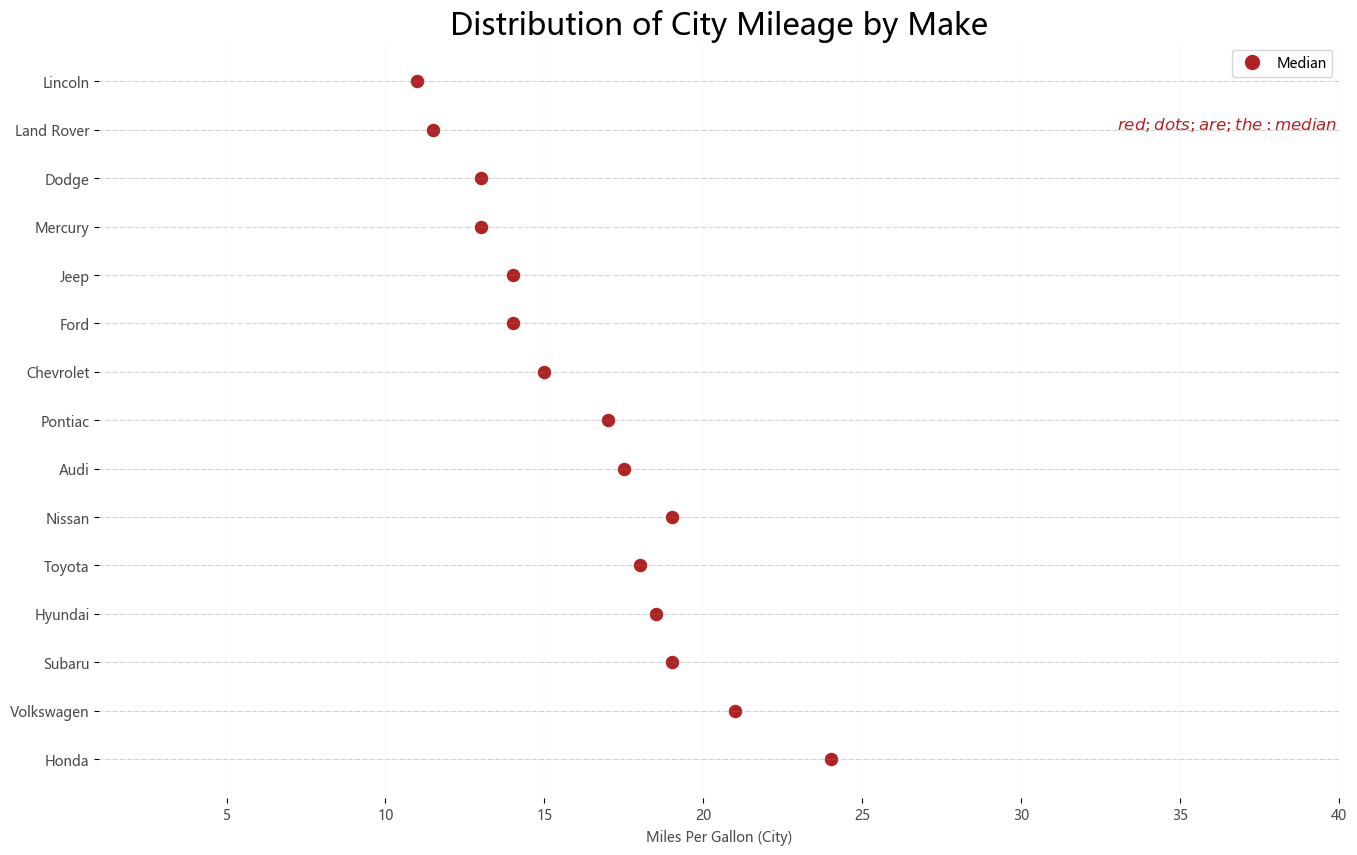

In [39]:
import matplotlib.patches as mpatches

# Prepare Data
df_raw = pd.read_csv("mpg_ggplot2.csv")
cyl_colors = {4:'red',5:'green',6:'blue', 8:'orange'}
df_raw[ 'cyl_color' ] = df_raw.cyl.map(cyl_colors)

# Mean and Median city mileage by make
df = df_raw[[ 'cty' ,  'manufacturer' ]].groupby( 'manufacturer' ).apply(lambda x: x.mean())
df.sort_values( 'cty' , ascending=False, inplace=True)
df.reset_index(inplace=True)
df_median = df_raw[[ 'cty' ,  'manufacturer' ]].groupby( 'manufacturer' ).apply(lambda x: x.median())

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.hlines(y=df.index, xmin=0, xmax=40, color= 'gray' , alpha=0.5, linewidth=.5, linestyles= 'dashdot' )

# Draw the Dots
for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer=='make', :]
    ax.scatter(y=np.repeat(i, df_make.shape[0]), x= 'cty' , data=df_make, s=75, edgecolors= 'gray' , c= 'w' , alpha=0.5)
    ax.scatter(y=i, x= 'cty' , data=df_median.loc[df_median.index==make, :], s=75, c= 'firebrick' )

    # Annotate    
ax.text(33, 13, "$red ; dots ; are ; the : median$", fontdict={ 'size' :12}, color= 'firebrick' )

# Decorations
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color= 'firebrick' , label="Median")
plt.legend(handles=red_patch)
ax.set_title( 'Distribution of City Mileage by Make' , fontdict={ 'size' :22})
ax.set_xlabel( 'Miles Per Gallon (City)' , alpha=0.7)
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={ 'horizontalalignment' :  'right' }, alpha=0.7)
ax.set_xlim(1, 40)
plt.xticks(alpha=0.7)
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)   
plt.grid(axis= 'both' , alpha=.4, linewidth=.1)
plt.show()